In [1]:
#IMPORTING LIBRARIES 
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as pyplot

#A sequential model takes into account the order of things happening and is linear, it is also fairly simple to use.
from keras.models import Sequential

#Dense layer is the regular deeply connected neural network layer. Essentially a vanilla NN
#The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Input data may have some of the unwanted data, usually called as Noise. Dropout will try to remove the noise data and thus prevent the model from over-fitting.
#LSTM is a Recurrent neural network that helps in sequential data (Data that needs to preserve order) and also helps fight the forgetting problem in vanilla RNN 
from keras.layers import LSTM,Dropout,Dense

#Transforms any actual range into a range of 0 to 1 so it is easier to work with, essentially the Sigmoid function / ReLU
from sklearn.preprocessing import MinMaxScaler

In [2]:
#IMPORTING DATA
df = pd.read_csv("Google_Stock_Price_Train.csv")
df

,Date,Open,High,Low,Close,Volume
0,2015-01-02,532.599976,535.799988,527.880005,529.549988,1324000
1,2015-01-05,527.150024,527.989990,517.750000,519.460022,2059100
2,2015-01-06,520.500000,521.210022,505.549988,506.640015,2722800
3,2015-01-07,510.950012,511.489990,503.649994,505.149994,2345900
4,2015-01-08,501.510010,507.500000,495.019989,506.910004,3652700
...,...,...,...,...,...,...
1253,2019-12-24,1350.209961,1352.010010,1344.170044,1344.430054,673400
1254,2019-12-26,1346.550049,1363.199951,1345.510010,1362.469971,1183100
1255,2019-12-27,1364.000000,1367.050049,1353.000000,1354.640015,1160600
1256,2019-12-30,1356.810059,1357.000000,1337.839966,1339.709961,999700


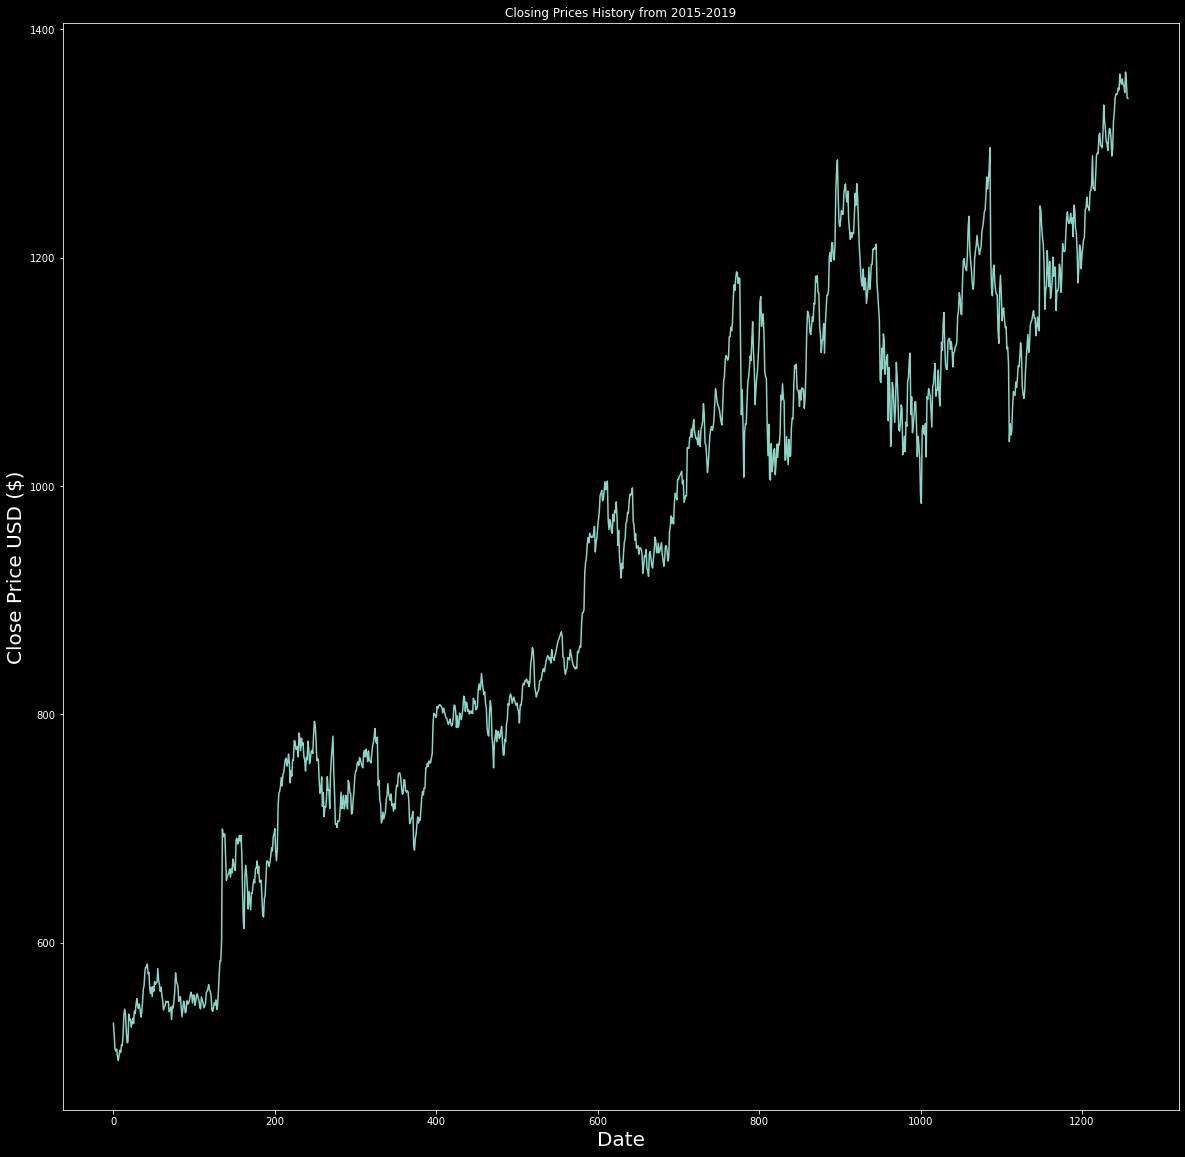

In [4]:
#VISUALISING CLOSING PRICES

#using my prefered styling for our graphs
pyplot.style.use('dark_background')
pyplot.figure(figsize=(20,20))
pyplot.plot(df['Close'])
pyplot.title("Closing Prices History from 2015-2019")
pyplot.xlabel('Date', fontsize=20)
pyplot.ylabel('Close Price USD ($)', fontsize=20)
pyplot.show()

In [34]:
#FILTERING THE DATA TO ONLY THE DATE AND CLOSE COLUMNS
#Filtering data set to only closed column
data=df.filter(['Close'])
#Converting to numpy array (Data has been changed to numbers)
dataset = data.values

In [33]:
#Scaling the data and Creating training data sets 
#Converting the data from arrays of hundreds to arrays of 0 to 1s so we can work with them efficiently 
scaled_data = MinMaxScaler(feature_range=(0,1)).fit_transform(dataset)
#Creating the training data set 
train_data = scaled_data[0:len(scaled_data)]

x_train_data,y_train_data=[],[]